# **Influência de Fatores Socioeconômicos na Distribuição de Renda**

---



Esse trabalho tem o intuito de analisar que tipo de pessoa normalmente pertence para receber $50.000,00 por ano. 

Durante o exercício, primeiro foi feito uma análise de dado utilizando [Adult Census Income dataset](https://www.kaggle.com/uciml/adult-census-income) dados que foram extraídos por Ronny Kohavi e Barry Becker


Através desses dados, percebe-se que os atributos atrelados a eles podem ser divididos em dois tipos: Tipos numéricos e tipos categóricos




## Tipos númericos
Como o nome sugere, são atributos cujo os valores são representados por números, entre eles existem:


*   `Age`: Indica a idade da pessoa associada, nesses dados, apenas é mostrado as pessoas acima de 16 anos.
*    `fnlwgt`: O número de indivíduos que as Organizações do Census acreditam que esse conjunto de observações representa. 


*   `education_num`: Uma enumeração da representação categórica da escolaridade. Quanto maior o número, maior a escolaridade o indivíduo alcançou. 

*   `capital_gain`: Os ganhos do indíviduo, representado em dólar americano.

*   `capital_loss`: As perdas do indivíduo, representado em dólar americano.
*   `hours_per_week`: Quantidade de horas que o indivíduo trabalha por semana.


## Tipos categóricos
São tipos onde cada atributo os valores atrelados a eles são representados por objetos, ou seja, palavras, entre eles existem:





*   `workclass`: O tipo de emprego que o individuo trabalho, seja ele do setor privado, ONG, do governo, etc...

*   `education`: Indica a escolaridade do indivíduo.
*  `marital_status`: Estado civil do indivíduo.


*   `occupation`: Profissão do indivíduo.



*  `relationship`: O seu tipo de relacionamento dentro da família, podendo ser: esposa, marido, filho único, etc...

*   `gender`: O gênero do indivíduo.
*    `race`: A cor de pele do indivíduo, se ele é branco, negro, asiático, etc...


*   `native_country`: A nacionalidade do indivíduo, podendo ele ser: americano, canadense, japônes, etc...



*   `income`: A faixa de renda da pessoa, se ela recebe mais ou menos que $50.000,00 por ano









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
# Dividir o dataset para sub dataset
from sklearn.model_selection import train_test_split
# Módulo que utilizaremos será o de Classificador ingênuo de Bayes utilizando método gaussiano
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# Importando as bibliotecas do Facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

**Carregando o dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

income_adult = pd.read_csv("/content/drive/MyDrive/Projetoncio/adult.csv")

Mounted at /content/drive


**Analisando os dados**

Fazendo análise dos dados, percebe-se então que dentro desse dataset existe consulta de 32561 pessoas, classificando elas através da sua idade, profissão, escolaridade, etc...

In [ ]:
income_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dessa forma, a gente consegue saber quantas colunas e o seu tipo que estamos lidando.
A gente também percebe que algumas dessas colunas, como por ex: capital.gain, marital.status está com caractere especial '.'. Dessa forma, o Pandas tem um método chamado .rename() que consegue alterar o nome da forma desejada.

In [ ]:
#Mudei o nome do income_adult para df com finalidade de escrever menos
df = pd.DataFrame(income_adult)
df.rename(columns={'marital.status': 'marital', 'capital.gain': 'capital gain', 'capital.loss': 'capital loss', 'hours.per.week': 'hours per week', 'native.country': 'native country'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'native country', 'income'],
      dtype='object')

No dataset fornecido, existe algumas colunas com algum simbolo especial, por ex: '?' e é preciso então limpar esses dados porque não é possível avaliar eles. Iremos procurar quais são essas colunas usando o método a seguir

In [ ]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
native country     583
income               0
dtype: int64

Dessa forma, percebe-se que existem 3 colunas que contém esse caractere especial: 'workclass' tem 1836 '?', 'occupation' tem 1843 '?', 'native country' tem 583 '?'
Como dito anteriormente, trabalhar com esses 'missing values' pode levar a uma predição incorreta e com isso, eu eliminarei aquelas linhas que existem esses valores especiais.

In [ ]:
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['native country'] = df['native country'].replace('?',np.nan)

df.dropna(how='any',inplace=True)



Primeiro, os valores '?' serão substituido por nan e nan é um jeito que Panda lida quando tem 'missing values', depois eu uso o método .dropna para remover essas linhas que tem NaN.

In [ ]:
df.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
native country    0
income            0
dtype: int64

Agora foi removido todas as pessoas que tinha missing value.
Percebe-se que agora, estamos lidando com dados de 30162 pessoas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital         30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital gain    30162 non-null  int64 
 11  capital loss    30162 non-null  int64 
 12  hours per week  30162 non-null  int64 
 13  native country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Nós vamos agora remover aqueles atributos que não são relevantes para o nosso objetivo, tais como: education.num, capital gain....

In [ ]:
df.drop(['education.num', 'fnlwgt', 'relationship', 'capital gain','capital loss'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   marital         30162 non-null  object
 4   occupation      30162 non-null  object
 5   race            30162 non-null  object
 6   sex             30162 non-null  object
 7   hours per week  30162 non-null  int64 
 8   native country  30162 non-null  object
 9   income          30162 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


Como o Pandas não consegue analisar os dados que são representados por tipos categóricos, há, então, a necessidade de fazer tratamento de objetos empregando dicionário. Dessa forma, transforma as palavras em tipo númerico.

In [ ]:
# Classe de trabalho
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
# Escolaridade
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
# Estado civil
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
# Cargo
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5, 'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
# Raça
df['race'] = df['race'].map({'White': 0, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 2, 'Other': 3, 'Black': 4}).astype(int)
# Sexo
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1}).astype(int)
# Países
df['native country'] = df['native country'].map({'Outlying-US(Guam-USVI-etc)': 0, 'India': 1, 'Jamaica': 2, 'El-Salvador': 3, 'Puerto-Rico': 4, 'Italy': 5, 'Thailand': 6, 'Philippines': 7, 'South': 8, 'Haiti': 9, 'Canada': 10, 'Dominican-Republic': 11, 'England': 12, 'Peru': 13, 'Trinadad&Tobago': 14, 'Ecuador': 15, 'China': 16, 'Nicaragua': 17, 'Columbia': 18, 'Hungary': 19, 'Hong': 20, 'Honduras': 21, 'Iran': 22, 'Portugal': 23, 'Poland': 24, 'Laos': 25, 'Greece': 26, 'Holand-Netherlands': 27, 'Japan': 28, 'Cuba': 29, 'Yugoslavia': 30, 'United-States': 31, 'Vietnam': 32, 'France': 33, 'Ireland': 34, 'Mexico': 35, 'Germany': 36, 'Guatemala': 37, 'Scotland': 38, 'Taiwan': 39, 'Cambodia':40}).astype(int)
# Renda
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
df.head(10)

,age,workclass,education,marital,occupation,race,sex,hours per week,native country,income
1,82,5,3,1,7,0,0,18,31,0
3,54,5,6,4,6,0,0,40,31,0
4,41,5,0,3,5,0,0,40,31,0
5,34,5,3,4,13,0,0,45,31,0
6,38,5,13,3,3,0,1,40,31,0
7,74,1,10,5,5,0,0,20,31,1
8,68,2,3,4,5,0,0,40,31,0
10,45,5,10,4,5,4,0,35,31,1
11,38,6,7,5,5,0,1,45,31,1
12,52,5,12,1,13,0,0,20,31,1


#Gráficos#

Iremos agora visualizar cada um desses atributos em formato de gráfico

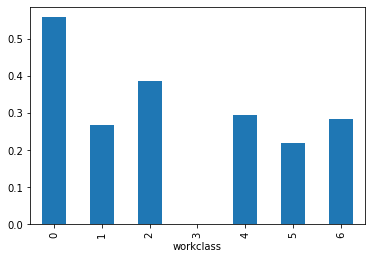

In [ ]:
df.groupby('workclass').income.mean().plot(kind='bar')


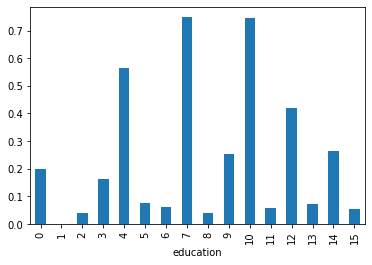

In [ ]:
df.groupby('education').income.mean().plot(kind='bar')

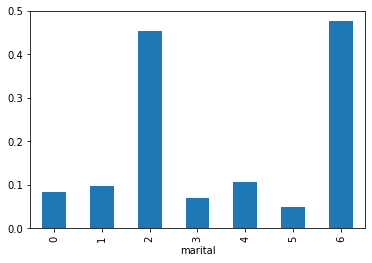

In [ ]:
df.groupby('marital').income.mean().plot(kind='bar')

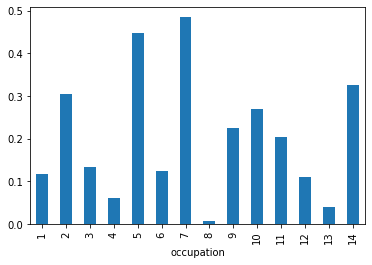

In [ ]:
df.groupby('occupation').income.mean().plot(kind='bar')

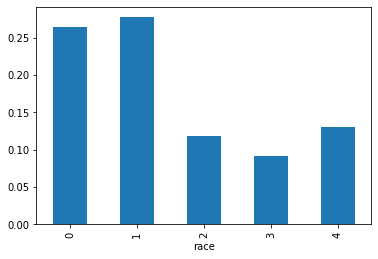

In [ ]:
df.groupby('race').income.mean().plot(kind='bar')

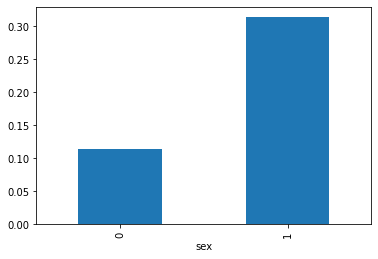

In [ ]:
df.groupby('sex').income.mean().plot(kind='bar')

#Matriz Correlacional#

Uma tabela que tem como objetivo resumir uma grande quantidade de dados e observar como é o padrão entre duas variáveis. Os valores em cada célula variam de 0 - 1 e isso indica os coeficientes de correlação entre as variáveis.

Quanto mais próximo do 1, quer dizer que essa variável é altamente relacionado com a outra variável observado.

Quanto mais próximo do 0, indica que essas duas variáveis não tem muita correlação entre si.

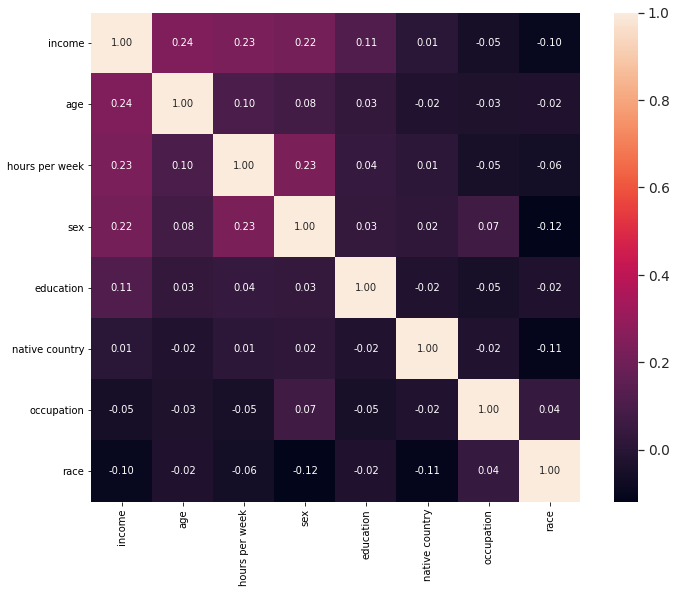

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



#Treinamento do módulo de classificador Gaussiano#

Nessa parte, estaremos treinando o nosso módulo a partir dos dados obtidos anteriormente

In [ ]:
#Dividindo os dados entre 80% fazendo treinamento de dados e 20% testando os dados
X_train, X_test = train_test_split(df, test_size=0.2, random_state=int(time.time()))
#Instanciando o nosso classificador Gaussiano
modelo = GaussianNB()
atributo = ["age", "workclass", "education", "marital", "occupation", "race", "sex", "hours per week", "native country"]

#Aqui acontece o treinamento desses atributos em cima do nosso "income"
#Método .fit serve para treinar o nosso modelo
#Método .predict serve para nos mostrar a previsão desse modelo
modelo.fit(X_train[atributo].values,
           X_train["income"])
y_pred = modelo.predict(X_test[atributo])

previsao = 100*(1-(X_test["income"] != y_pred).sum()/X_test.shape[0])

print("Desempenho do classificador: {:03.2f}%".format(previsao))



Desempenho do classificador: 74.64%


Probabilidade de pessoa receber >50K ou <=50K

In [ ]:
#Pessoas recebendo acima de $50.000,00
mean_income=np.mean(X_train["income"])
#Pessoas recebendo abaixo ou igual a $50.000,00
not_income=1-mean_income
print("Pessoas com renda acima de $50.000,00K por ano  = {:03.2f}%\nPessoas com renda abaixo de $50.000,00K por ano = {:03.2f}%"
      .format(100*mean_income,100*not_income))

Pessoas com renda acima de $50.000,00K por ano  = 24.78%
Pessoas com renda abaixo de $50.000,00K por ano = 75.22%


Por fim, usarei um dos atributos que nesse caso é o estado civil de individuo e relacionar ele com a faixa de renda. Estarei aqui usando o classificador ingênuo de Bayes. Também verifico o desempenho do nosso modelo, o desvio padrão e a sua média.

In [ ]:
atributo = ["marital"]
y_pred = modelo.fit(X_train[atributo].values, X_train["income"]).predict(X_test[atributo])
print("Número de erros do total de {} pessoas : {}, desempenho: {:01.2f}%"
      .format(
          X_test.shape[0],
          (X_test["income"] != y_pred).sum(),
          100*(1-(X_test["income"] != y_pred).sum()/X_test.shape[0])
))
print("Desvio padrão relacionando o estado civil com a renda menor que $50.000,00: {:01.2f}".format(np.sqrt(modelo.sigma_)[0][0]))
print("Desvio padrão relacionando o estado civil com a renda maior que $50.000,00: {:01.2f}".format(np.sqrt(modelo.sigma_)[1][0]))
print("Média relacionando o estado civil com a renda menor que $50.000,00: {:01.2f}".format(modelo.theta_[0][0]))
print("Média relacionando o estado civil com a renda maior que $50.000,00: {:01.2f}".format(modelo.theta_[1][0]))



Número de erros do total de 6033 pessoas : 1530, desempenho: 74.64%
Desvio padrão relacionando o estado civil com a renda menor que $50.000,00: 1.46
Desvio padrão relacionando o estado civil com a renda maior que $50.000,00: 0.88
Média relacionando o estado civil com a renda menor que $50.000,00: 3.54
Média relacionando o estado civil com a renda maior que $50.000,00: 2.30


#**Testando o modelo**


##Teste 1:

Realizei a predição se uma pessoa que tem idade: 21 anos, classe de trabalho: Setor privado (5), escolaridade: Ensino médio (3), estado civil: Não-casado (5), profissão: Suporte técnico (2), cor de pele: Branco(0), gênero: Masculino(1), horas por semana: 20 horas, nacionalidade: Peruano (13) receberia mais que $50.000,00/ano ou não.

Se o resultado do array for 0 => significa que a previsão mostra que possivelmente essa pessoa recebe menos ou igual que $50.000,00/ano.

Se o resultado do array for 1 => significa que a previsão mostra que possivelmente essa pessoa recebe mais que $50.000,00/ano.




In [ ]:
modelo.predict([[21, 5, 3, 5, 2, 0, 1, 20, 13]])

array([0])

Como o resultado = 0, então o modelo nos retorna que essa pessoa possivelmente recebe menos que $50.000,00 por ano

##Teste 2:

Realizei a predição se uma pessoa que tem idade: 35 anos, classe de trabalho: Setor privado (5), escolaridade: Bacharel (12), estado civil: Casado (2), profissão: Profissional da área (5), cor de pele: Branco (0), gênero: Masculino (1), horas por semana: 40 horas, nacionalidade: Canadense (10) receberia mais que $50.000,00/ano ou não.

In [ ]:
modelo.predict([[35, 5, 12, 2, 5, 0, 1, 40, 10]])

array([0])

Como o resultado = 0, então o modelo nos retorna que essa pessoa possivelmente recebe menos que $50.000,00 por ano

# Visualizando o nosso dataSet através do gráfico disponibilizado pelo Facets

Observaremos os dados obtidos através do gráfico feito por [Facets Dive](https://pair-code.github.io/facets/), uma ferramenta com interface interativa que nos permite visualizar cada um dos atributos desejado. 

Usarei então o método .to_json() para utilizar essa ferramenta

In [ ]:
#@title Observando os dados através do Facets Dive

Quantidade_de_pessoas =  4000#@param
  
train_dive = income_adult.sample(Quantidade_de_pessoas).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

Foi inserido uma parcela de população (3000) pessoas com o propósito de mostrar como cada uma delas está dividido através dos seus atributos.